# Carga de tablas 

In [1]:
import pandas as pd

import numpy as np


datos = pd.read_excel('inversion_por_comunas_y_corregimientos_2016_medellin.xlsx')#se carga la base de datos

#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Códigos transformación de datos

In [2]:
from sklearn import preprocessing
from collections import defaultdict

df1 = df
d = defaultdict(preprocessing.LabelEncoder)


def SoloInt(X): #Método para saber si toda la columna es de int
    #for j in range (len(X)):
    if not(X.dtype == 'int64'):            
            print("Entro", X.dtype)
            return False
    return True


labels = []
for c in datos:
    labels.append(c)#Contiene todas las características de la base de datos


for i in range (len(labels)):
    if not (SoloInt(df[labels[i]])):
        # Codificando la variable
        df1[labels[i]] = df1[labels[i]].astype(str)
        df1[labels[i]] = d[labels[i]].fit_transform(df[labels[i]])               
        



# Inveritr codificado
#fit.apply(lambda x: d[x.name].inverse_transform(x))

# Usar el diccionario para la etiqueta de código futuro
#x = df.apply(lambda x: d[x.name].transform(x)

datosCodificados = df1
datosCodificados

Entro object


,CodDependencia,Tipo de Inversion,CodBPIN,Nombre_proy_Ajustado,Comuna,Inversion
0,701,0,120360,545,99,4052174
1,701,0,140183,692,99,378263011
2,702,1,150473,242,13,8191000
3,702,1,150112,464,8,23978400
4,702,1,150169,450,70,32764000
5,702,1,150117,229,12,35620387
6,702,1,150172,525,90,36564945
7,702,1,150119,266,14,38116666
8,702,1,150109,375,5,49674103
9,702,1,150168,412,60,58386688


# Empieza tratamiento de datos

In [4]:
#Pasar de DataFrame a Matriz
datosNuevos = datosCodificados.values
datosNuevos

array([[       701,          0,     120360,        545,         99,
           4052174],
       [       701,          0,     140183,        692,         99,
         378263011],
       [       702,          1,     150473,        242,         13,
           8191000],
       ...,
       [       917,          0,     150047,        694,          7,
          93243243],
       [       917,          0,     150047,        694,          9,
          95270271],
       [       917,          0,     150047,        694,         99,
        1814695945]], dtype=int64)

# Manejo de Outliers

In [5]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(datosCodificados)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,CodDependencia,Tipo de Inversion,CodBPIN,Nombre_proy_Ajustado,Comuna,Inversion
86,711,0,130263,663,3,3494400
87,711,0,80546,685,4,3571517
88,711,0,80559,892,15,3603450
89,711,0,80546,685,9,3608086
90,711,0,80546,685,5,3790928
91,711,0,80546,685,7,4241939
92,711,0,150302,656,3,4321907
93,711,0,150302,656,11,4321907
94,711,0,80559,892,14,4324140
95,711,0,130263,663,2,4335720


# Escalamiento de Datos

C:\Users\Hector\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


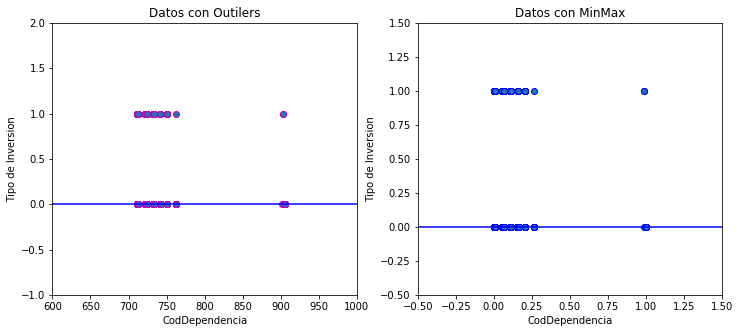

In [7]:
from sklearn.preprocessing import MinMaxScaler 
from matplotlib import pyplot # Librería para hacer gráficas


MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,0], datosNuevos[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(600, 1000) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(-1, 2) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('CodDependencia') # Etiqueta del eje x
pyplot.ylabel('Tipo de Inversion') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(-0.5, 1.5) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(-0.5,  1.5) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('CodDependencia') # Etiqueta del eje x
pyplot.ylabel('Tipo de Inversion') # Etiqueta del eje y

pyplot.show()

# Normalización de Datos

In [8]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

datosNormalizados = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        datosNormalizados[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4

datosNormalizados

array([[0.00000000e+00, 0.00000000e+00, 7.14232754e-01, 6.36729223e-01,
        1.13636364e-02, 1.09368124e-05],
       [0.00000000e+00, 0.00000000e+00, 5.34690735e-03, 6.66219839e-01,
        2.27272727e-02, 4.23734728e-05],
       [0.00000000e+00, 0.00000000e+00, 5.53226680e-03, 9.43699732e-01,
        1.47727273e-01, 5.53909252e-05],
       ...,
       [1.00000000e+00, 0.00000000e+00, 2.25283030e-03, 5.85790885e-01,
        1.47727273e-01, 7.98839514e-01],
       [1.00000000e+00, 0.00000000e+00, 2.25283030e-03, 5.85790885e-01,
        3.40909091e-02, 8.86904044e-01],
       [1.00000000e+00, 0.00000000e+00, 2.25283030e-03, 5.85790885e-01,
        1.59090909e-01, 9.02790326e-01]])

# Reducción de dimensionalidad

In [25]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 6, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([0.31834387, 0.24953606, 0.2149094 , 0.09991318, 0.0629556 ,
       0.05434188])

[0.31834387 0.56787993 0.78278934 0.88270251 0.94565812 1.        ]


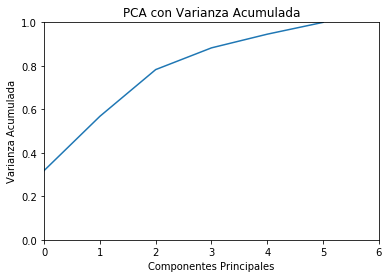

In [26]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [27]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares #Para verificar cuales componentes son las que acumulan la mayor cantidad de información

array([16.66960598, 14.75855202, 13.69634851,  9.33874411,  7.41300469,
        6.88722762])

In [28]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape, "Tamaño datos originales") # Tamaño de los datos originales
print(Nuevos_Datos.shape, "Tamaño nuevo de los datos")

(2375, 6) Tamaño datos originales
(2375, 6) Tamaño nuevo de los datos


In [29]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(2375, 6)

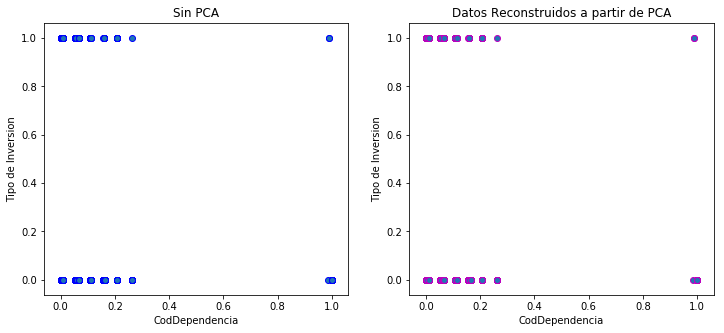

In [30]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('CodDependencia') # Etiqueta del eje x
pyplot.ylabel('Tipo de Inversion') # Etiqueta del eje y
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('CodDependencia') # Etiqueta del eje x
pyplot.ylabel('Tipo de Inversion') # Etiqueta del eje y
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

### Prueba con 90%

In [31]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.90, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datosprueba = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape, "Tamaño datos originales") # Tamaño de los datos originales
print(Nuevos_Datosprueba.shape, "Tamaño nuevo de los datos")

(2375, 6) Tamaño datos originales
(2375, 5) Tamaño nuevo de los datos


In [32]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datosprueba)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(2375, 6)

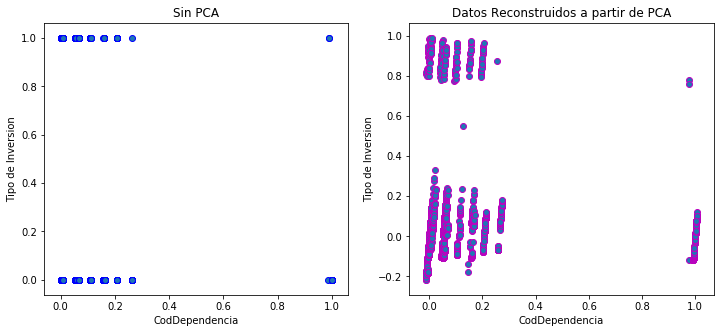

In [33]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('CodDependencia') # Etiqueta del eje x
pyplot.ylabel('Tipo de Inversion') # Etiqueta del eje y
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('CodDependencia') # Etiqueta del eje x
pyplot.ylabel('Tipo de Inversion') # Etiqueta del eje y
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# K MEANS

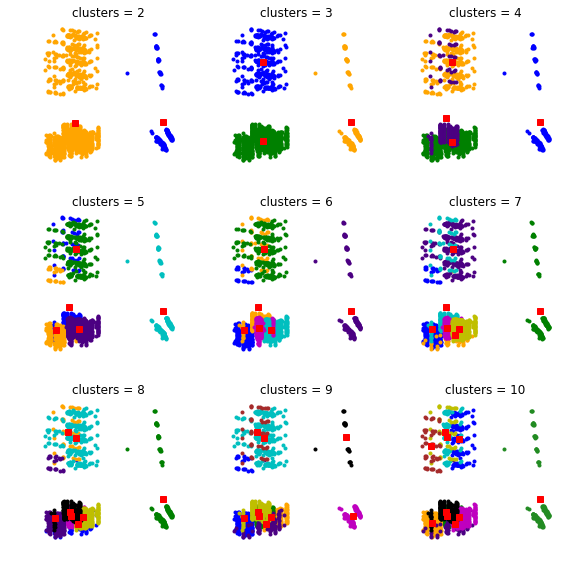

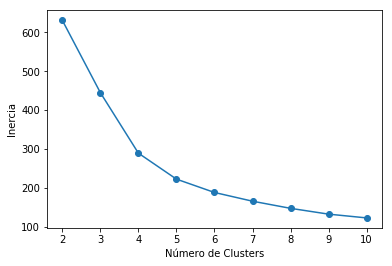

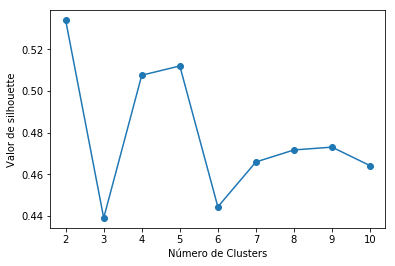

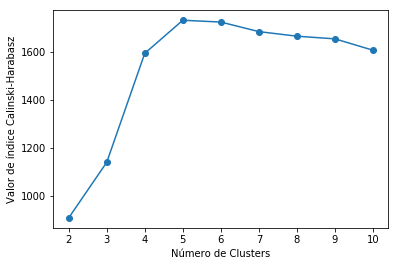

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabaz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    # Se construye el modelo Kmeans
    # n_clusters es el número de clusters
    # init es la condición inicial de los centros. 'random' signfica que se genera aleatoriamente los centros.
    # Se puede usar en int la opción ‘k-means++’, el cual selecciona los centros iniciales del cluster para
    # que el algoritmo de una manera inteligente converga rápidamente. Se aconseja usar esta opción para datos de alta
    # dimensionalidad.
    # n_init es el número de veces que el algoritmo actualiza los centros. Por defecto es 10 pero puedes cambiar el valor.
    # tol es el error que se desea superar.
    # max_iter es el número de iteraciones.
    # precompute_distances es una opción para pre-calcular las distancias. Si seleccionas 'True', entonces siempre se pre-calcula
    # las distancias. Si es 'False', entonces nunca se pre-calcula las distancias. Si es 'auto', entonces se selecciona
    # 'True' o 'False' de acuerdo al número de muestras y el número de clases. Se recomienda esta última opción.
    # algorithm es el algoritmo K-means a utilizar. Si es "full", se aplica el estilo clásico del algoritmo. Si es "elkan",
    # se aplica una variación del algoritmo k-means para mayor eficiencia pero se recomienda para datos que no esten tan
    # esparcidos. Si es "auto", entonces selecciona "elkan" si los datos son densos o "full" si los datos son esparcidos.
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabaz_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])

    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()

### Prueba de K means con 5 caracteristicas

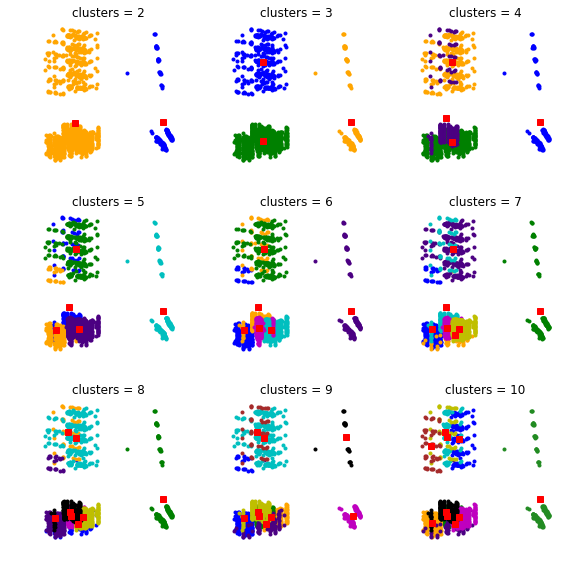

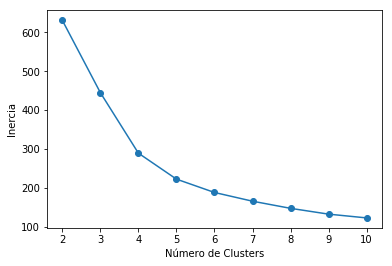

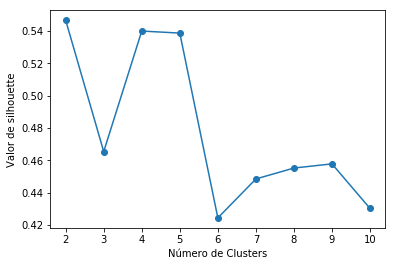

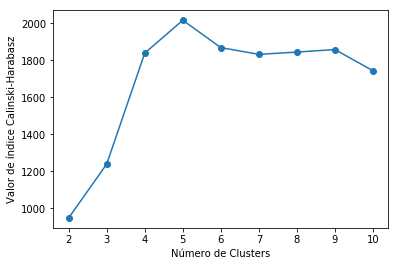

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabaz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datosprueba[:,0]
ypts =  Nuevos_Datosprueba[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datosprueba, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabaz_score(Nuevos_Datosprueba, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])

    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()

## Spectral Clustering

Para  2  Clusters: 
El total de datos de la clase  0  son:  2200
El total de datos de la clase  1  son:  175
Para  3  Clusters: 
El total de datos de la clase  0  son:  486
El total de datos de la clase  1  son:  175
El total de datos de la clase  2  son:  1714
Para  4  Clusters: 
El total de datos de la clase  0  son:  439
El total de datos de la clase  1  son:  175
El total de datos de la clase  2  son:  1539
El total de datos de la clase  3  son:  222
Para  5  Clusters: 
El total de datos de la clase  0  son:  396
El total de datos de la clase  1  son:  175
El total de datos de la clase  2  son:  258
El total de datos de la clase  3  son:  1324
El total de datos de la clase  4  son:  222
Para  6  Clusters: 
El total de datos de la clase  0  son:  356
El total de datos de la clase  1  son:  175
El total de datos de la clase  2  son:  257
El total de datos de la clase  3  son:  488
El total de datos de la clase  4  son:  222
El total de datos de la clase  5  son:  877
Para  7  Cluster

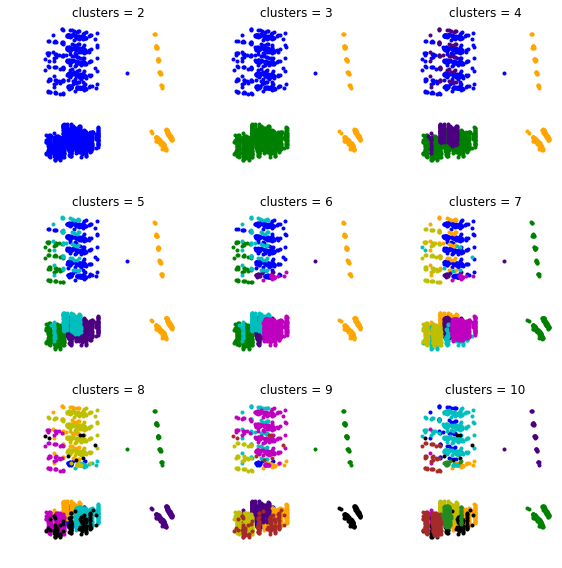

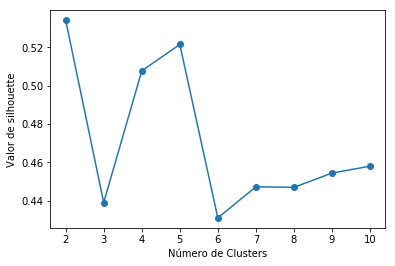

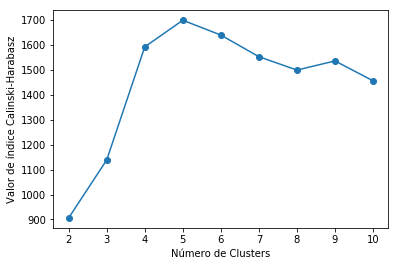

In [37]:
import networkx as nx
from sklearn.cluster import SpectralClustering
from sklearn import metrics

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

silhouette_valores = []
ch_valores = []
    

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    
    spectral_clustering = SpectralClustering(n_clusters=ncenters, random_state=0).fit(Nuevos_Datos)
    
    Etiquetas_spectral = spectral_clustering.labels_ # Calcula las clases o etiquetas
    
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas_spectral)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabaz_score(Nuevos_Datos, Etiquetas_spectral)) # Se aplica la métrica Calinski-Harabasz
    
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas_spectral == j],
                ypts[Etiquetas_spectral == j], '.', color=colors[j])
        
    print("Para ", ncenters, " Clusters: ")   
    for i in range (len(np.unique(Etiquetas_spectral))):
        
        print("El total de datos de la clase ", i, " son: ", len(Etiquetas_spectral[Etiquetas_spectral==i]))
    
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()